In [1]:
# Stochastic block model behavior
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import math as mt
from scipy import linalg

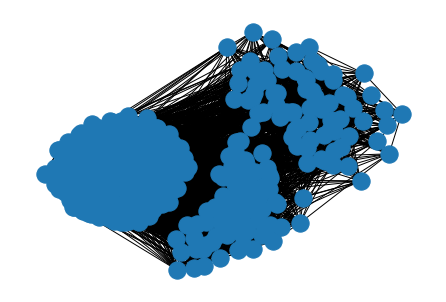

In [2]:
sizes = [75, 75, 300]
probs = [[0.25, 0.05, 0.02], [0.05, 0.35, 0.07], [0.02, 0.07, 0.40]]
g = nx.stochastic_block_model(sizes, probs, seed=0)
nx.draw(g)

2
2


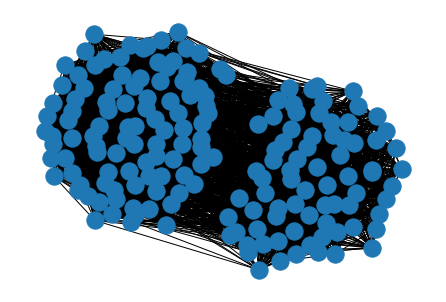

In [44]:
sizes = [100,75]
p = [[0.5,0.1],
     [0.1,0.5]]
print(len(sizes))
print(len(p))
g0 = nx.stochastic_block_model(sizes, p, seed=0)
nx.draw(g0)

2
2


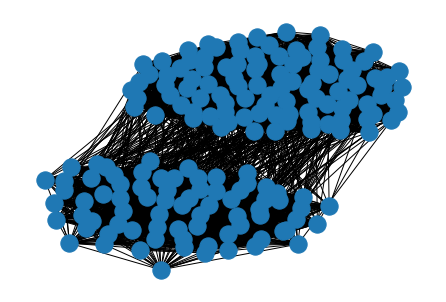

In [4]:
sizes = [100,75]
p = [[0.5,0.05],
     [0.05,0.5]]
print(len(sizes))
print(len(p))
g2 = nx.stochastic_block_model(sizes, p, seed=0)
nx.draw(g2)

2
2


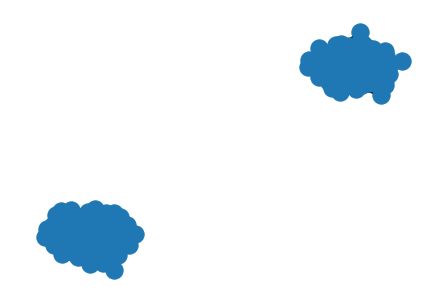

In [87]:
sizes = [75,75]
p = [[0.25,0.00001],
     [0.00001,0.25]]
print(len(sizes))
print(len(p))
g0 = nx.stochastic_block_model(sizes, p, seed=0)
nx.draw(g0,with_labels=False)

Graph named 'stochastic_block_model' with 150 nodes and 1342 edges
150
<Layout with 150 vertices and 3 dimensions>


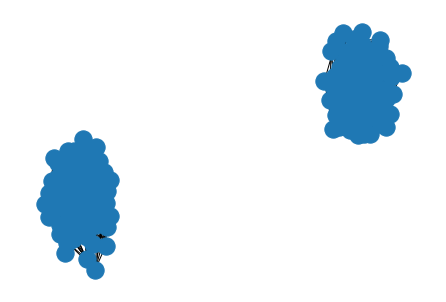

In [88]:
import networkx as nx
from torch_geometric.utils import *
grafo_init = g0
print(grafo_init)
A = grafo_init
l=[]
for a in A.nodes:
    l.append(a)
ed= []
for e in A.edges:
    ed.append(e)
import igraph as ig
import chart_studio.plotly
Edges= ed
G=ig.Graph(Edges, directed=False)
labels= l
#groups = A.node_attr_dict_factory
N = len(A.nodes)
print(N)
layt=G.layout('kk', dim=3)
print(layt)
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
#print(Edges)
for e in Edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]
nx.draw(A)



node_adjacencies = []
node_text = []

for node, adjacencies in enumerate(A.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))


In [91]:
from chart_studio import plotly
import plotly.graph_objs as go

trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=0.5),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size=6,
                             #color='#ff7f0e',
                             #colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=labels,
               hoverinfo='text'
               )
trace2.marker.color = node_adjacencies
#trace2.text = node_text
axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="3D graph visualization of Mutag dataset  by : Ahmed",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="Data source: <a href='https://plotly.com/python/v3/3d-network-graph/</a>",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

In [92]:
import pandas as pd
import numpy as np
%matplotlib inline
import plotly.graph_objs as go
from  plotly.offline import plot
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected='true')
data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)

iplot(fig, filename='Les-Miserables')

In [ ]:
#!pip install python-louvain

In [17]:
#!pip install python-louvain
##Funcion encontrada en: https://towardsdatascience.com/generative-graph-models-with-networkx-727b154ceda4
from community import community_louvain

def generate_sbm(size, probs, seed):
    """ Function to generate graph networks using 
    Stochastic Block Model

    Parameters
    ----------
    n: int
      Number of nodes
    r: float
      probability of the edge

    Returns
    -------
    random graph
    """
    return nx.stochastic_block_model(size, probs, seed=seed)

def plot_sbm(G, seed):
    """ Plots the Stochastic Block Model graph

    Parameters
    ----------
    G: graph
    seed: int
      random seed

    Returns
    -------
    None
    """
    partition = community_louvain.best_partition(G, random_state=seed)
    #pos = community_layout(G, partition, seed)
    nx.draw(G, node_color=list(partition.values()))
    plt.show()


def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

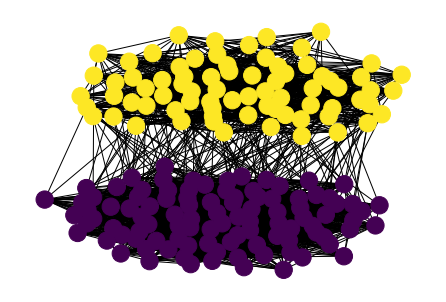

In [105]:
# Set size of each community
community_sizes = [100, 75]
# Edge probabilities between each community
community_probs =[[0.3,0.02], 
                  [0.02,0.3]]
seed=1234

G_sbm1 = generate_sbm(community_sizes, community_probs, seed)
plot_sbm(G_sbm1, seed)